# Классификация изображений

In [1]:
# Импорты нужных нам библиотек и фреймворков
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import zipfile
import random
from shutil import copyfile

print(tf.__version__)

/home/andor/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/home/andor/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/home/andor/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/home/andor/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/home/andor/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/home/andor/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: cannot open shared object file: No s

2.11.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['Футболка/топ', 'Брюки', 'Пуловер', 'Платье', 'Пальто',
               'Сандалии', 'Рубаха', 'Кроссовки', 'Сумка', 'Полуботинки']

Посмотрим на характеристики набора данных

In [3]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


Каждое индивидуальное изображение должно быть полутоновым. Убедимся на примере, что изображения имеют размер 28x28, а значения интенсивности пикселей попадают в диапазон 0..255

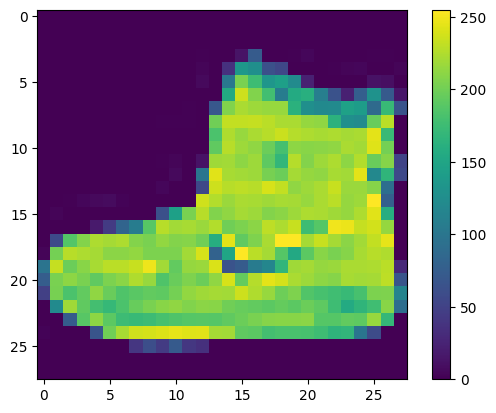

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Посмотрели - теперь приведём яркости к диапазону 0..1
train_images = train_images / 255.0
test_images = test_images / 255.0

Посмотрим на образцы

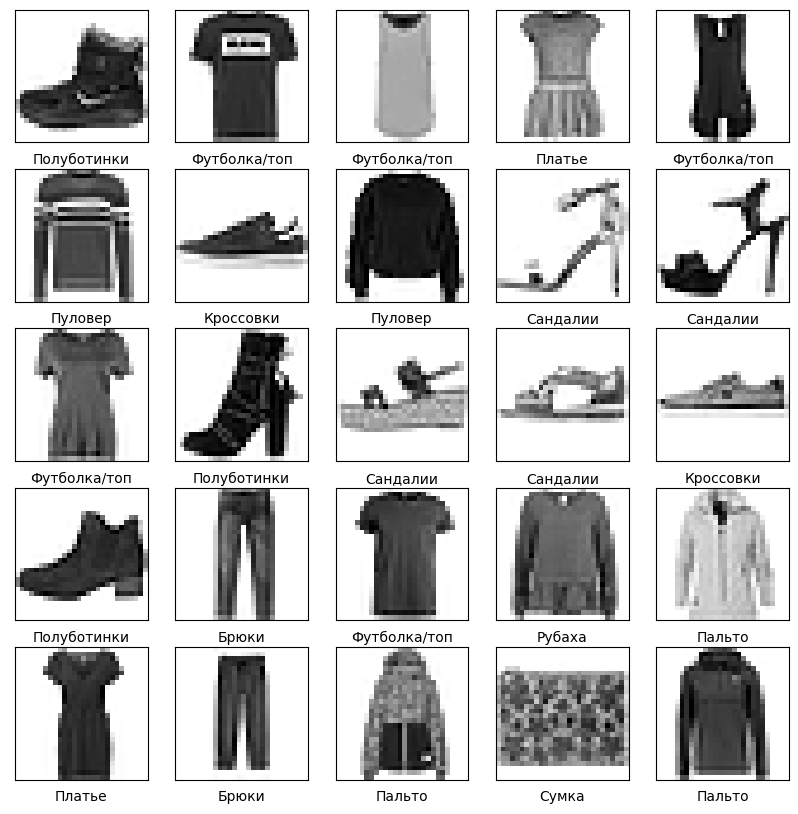

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Соберём простую модель. Раз изображения - сразу на свёрточных сетях.

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Компилируем модель

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

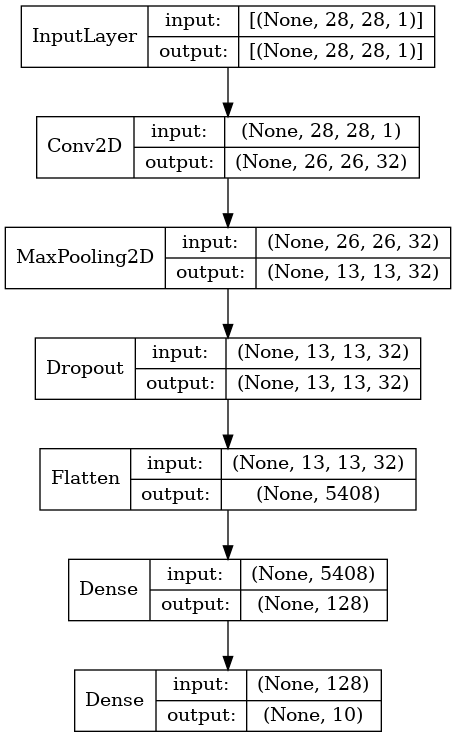

In [7]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

Обучим нашу сеть

In [8]:
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)
history = model.fit(train_images, train_labels, batch_size=256, epochs=10,validation_split=0.2,verbose=1)

2023-05-06 12:55:51.602453: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/10


2023-05-06 12:55:54.102480: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 22151168 exceeds 10% of free system memory.
2023-05-06 12:55:54.222904: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 22151168 exceeds 10% of free system memory.


  2/188 [..............................] - ETA: 33s - loss: 2.2217 - accuracy: 0.1934 

2023-05-06 12:55:54.343357: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 22151168 exceeds 10% of free system memory.
2023-05-06 12:55:54.415387: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 22151168 exceeds 10% of free system memory.


188/188 [==============================] - 19s 94ms/step - loss: 0.5354 - accuracy: 0.8132 - val_loss: 0.3947 - val_accuracy: 0.8578
Epoch 2/10
188/188 [==============================] - 18s 97ms/step - loss: 0.3460 - accuracy: 0.8783 - val_loss: 0.3304 - val_accuracy: 0.8817
Epoch 3/10
188/188 [==============================] - 18s 94ms/step - loss: 0.3079 - accuracy: 0.8914 - val_loss: 0.3230 - val_accuracy: 0.8795
Epoch 4/10
188/188 [==============================] - 18s 95ms/step - loss: 0.2824 - accuracy: 0.8994 - val_loss: 0.2926 - val_accuracy: 0.8938
Epoch 5/10
188/188 [==============================] - 18s 93ms/step - loss: 0.2637 - accuracy: 0.9064 - val_loss: 0.2757 - val_accuracy: 0.9038
Epoch 6/10
188/188 [==============================] - 18s 96ms/step - loss: 0.2491 - accuracy: 0.9101 - val_loss: 0.2730 - val_accuracy: 0.9014
Epoch 7/10
188/188 [==============================] - 18s 93ms/step - loss: 0.2319 - accuracy: 0.9162 - val_loss: 0.2555 - val_accuracy: 0.9104
Epo

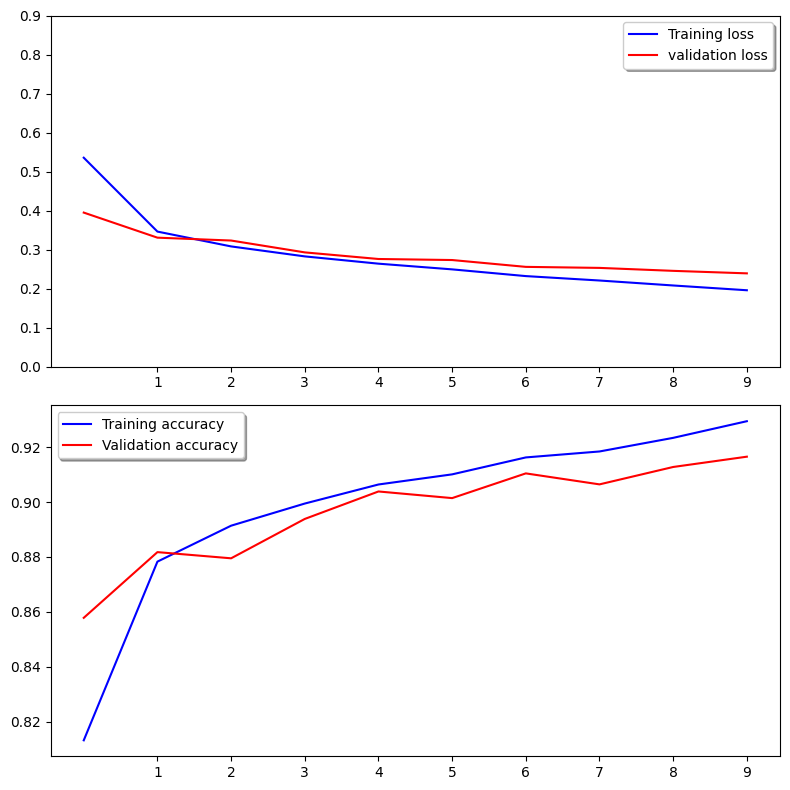

In [9]:
def learning_curves(history, epochs):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
    ax1.plot(history.history['loss'], color='b', label="Training loss")
    ax1.plot(history.history['val_loss'], color='r', label="validation loss")
    ax1.set_xticks(np.arange(1, epochs, 1))
    ax1.set_yticks(np.arange(0, 1, 0.1))
    legend1 = ax1.legend(loc='best', shadow=True)

    ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax2.set_xticks(np.arange(1, epochs, 1))

    legend2 = ax2.legend(loc='best', shadow=True)
    plt.tight_layout()
    plt.show()

learning_curves(history, 10)

In [10]:
predicted_classes = model.predict(test_images)
predicted_classes = np.argmax(predicted_classes, axis=1)
print(classification_report(test_labels, predicted_classes, target_names=class_names))

313/313 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

Футболка/топ       0.85      0.86      0.86      1000
       Брюки       0.99      0.98      0.99      1000
     Пуловер       0.84      0.88      0.86      1000
      Платье       0.91      0.92      0.91      1000
      Пальто       0.86      0.84      0.85      1000
    Сандалии       0.97      0.98      0.98      1000
      Рубаха       0.75      0.74      0.74      1000
   Кроссовки       0.95      0.98      0.96      1000
       Сумка       0.99      0.97      0.98      1000
 Полуботинки       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Проанализируем ошибки.

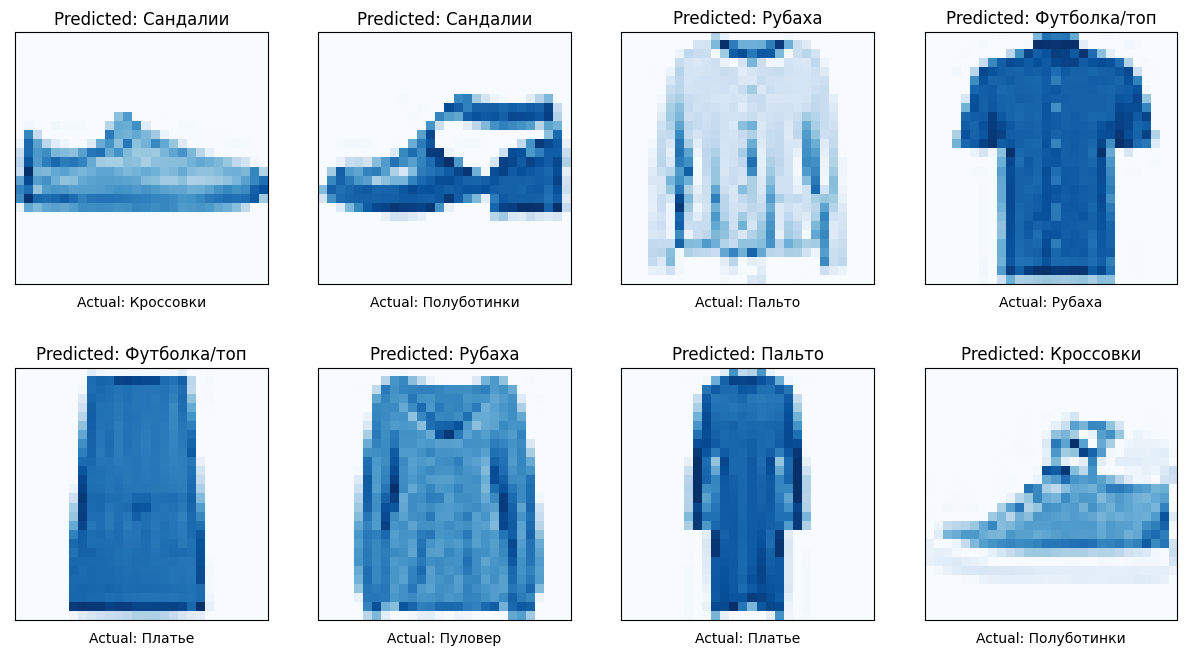

In [11]:
incorrect = np.nonzero(predicted_classes!=test_labels)[0]
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[incorrect].reshape(28, 28), cmap="Blues")
    plt.title("Predicted: {}".format(class_names[predicted_classes[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[test_labels[incorrect]]))

## Классификация на своих данных

В реальности, мы будем решать задачу классификации не на встроенных наборах, а на своих данных. Рассмотрим, как мы будем готовить наборы для обучения модели на примере датасета "Cats vs Dogs". Этот набор не является встроенным и представляет собой архив с изображениями.

In [12]:
# Раскомментируйте строки ниже, если будете запускать пример на *NIX системах или в Colab. Иначе распакуйте вручную
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
!unzip -q kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0  2561k      0  0:05:14  0:05:14 --:--:-- 3184k58k  0:00:33 2346k
replace PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


### Подготовка своего набора данных.

Набор данных для решения задачи классификации, как правило, имеет определённую структуру. При этом фреймворк TensorFlow и API Keras предполагают, что данные изображений будут предъявляться на вход модели в определённой структуре. Её примерный вид показан ниже на рис.

<img src="images_cls/dataset.png" alt="Image classification" style="width: 800px; height: 400px;">

Как видно из рисунка, предполагается, что для каждого класса будет создана директория, которая и будет содержать изображения объектов, которые относятся к ней.

In [12]:
import pathlib
data_dir = pathlib.Path("PetImages")

Отфильтруем испорченные изображения и побочные файлы, анализируя наличие корректного заголовка графического файла.

In [13]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join(data_dir, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
            is_bmp = tf.compat.as_bytes("BM") in fobj.peek(0)
            is_gif = tf.compat.as_bytes("GIF89") in fobj.peek(0)
            is_png = tf.compat.as_bytes("PNG") in fobj.peek(1)
        finally:
            fobj.close()

        if not is_jfif and not is_bmp and not is_gif and not is_png:
            num_skipped += 1
            # Удаляем испорченные и не поддерживаемые изображения
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [14]:
image_size = (150, 150)
batch_size = 16

train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23659 files belonging to 2 classes.
Using 18928 files for training.
Found 23659 files belonging to 2 classes.
Using 4731 files for validation.


In [15]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

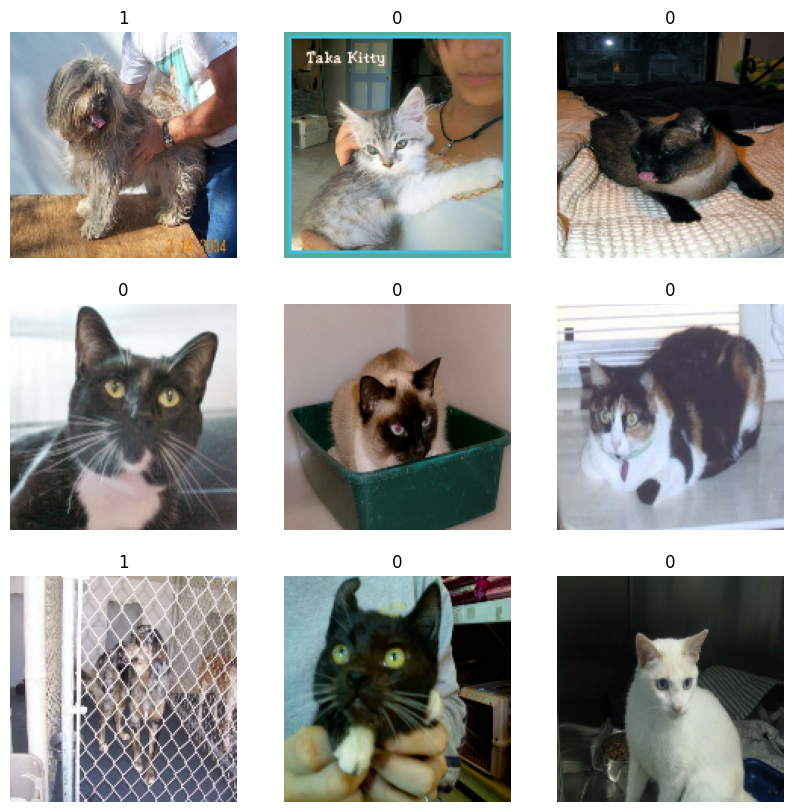

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


## Классифицирующая модель.

В качестве классификатора используем свёрточную нейронную сеть, сделав её чуть сложнее, чем в случае Fashion MNIST.

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1.0 / 255, input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.compile(loss=tf.keras.losses.binary_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 64)       

In [19]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10, verbose=1)

Epoch 1/10
  28/1183 [..............................] - ETA: 4:34 - loss: 0.7921 - accuracy: 0.5268

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 174/1183 [===>..........................] - ETA: 4:42 - loss: 0.7067 - accuracy: 0.5348

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 183/1183 [===>..........................] - ETA: 4:41 - loss: 0.7045 - accuracy: 0.5406

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 292/1183 [======>.......................] - ETA: 4:17 - loss: 0.6909 - accuracy: 0.5640

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 385/1183 [========>.....................] - ETA: 3:53 - loss: 0.6803 - accuracy: 0.5810

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 564/1183 [=============>................] - ETA: 2:57 - loss: 0.6626 - accuracy: 0.6086

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 677/1183 [================>.............] - ETA: 2:23 - loss: 0.6526 - accuracy: 0.6197

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 709/1183 [================>.............] - ETA: 2:14 - loss: 0.6515 - accuracy: 0.6206

InvalidArgumentError: Graph execution error:

Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_15226]

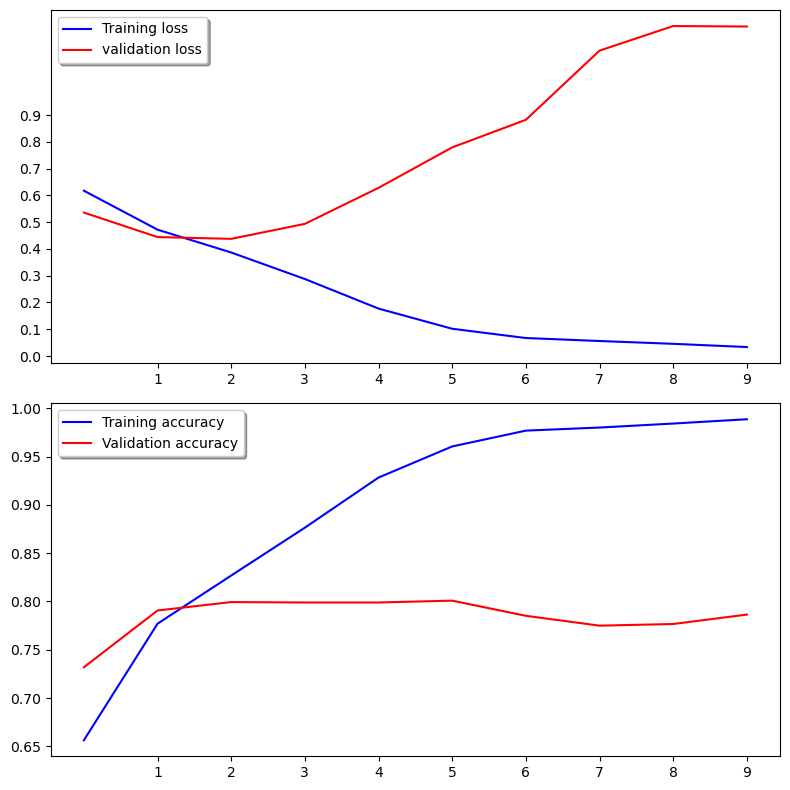

In [ ]:
learning_curves(history, 10)

## Дополнение (обогащение) данных.

В общем случае, задача классификации изображений сопряжена со следующими сложностями:
* изменчивость области просмотра
* разница в освещении
* деформация и обрезка объектов
* и др.

Чтобы нейронная сеть научилась распознавать объекты в любых условиях, её надо в этих же условиях и обучить. Следовательно, понадобятся данные с учётом всех указанных выше особенностей. При этом, чтобы провести обучение, нам понадобится значимая выборка для каждого варианта.

Данные не всегда просто собрать, к тому же, не всегда получится найти примеры с учётом всех возможных отклонений. Поэтому на практике выполняют дополнение данных.

Обогащени данных (Data Augmentation) - это искусственное расширение исходной выборки, за счёт которого можно как просто увеличить количество обучающих примеров, так и попытаться учесть особенности класификации изображений в разных условиях.


### Реализация обогащения данных

Один из вариантов: сделать обогащение данных самостоятельным преобразубщим алгоритмом

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

Посмотрим, что получится, если мы применим этот алгоритм к нашим котэ.

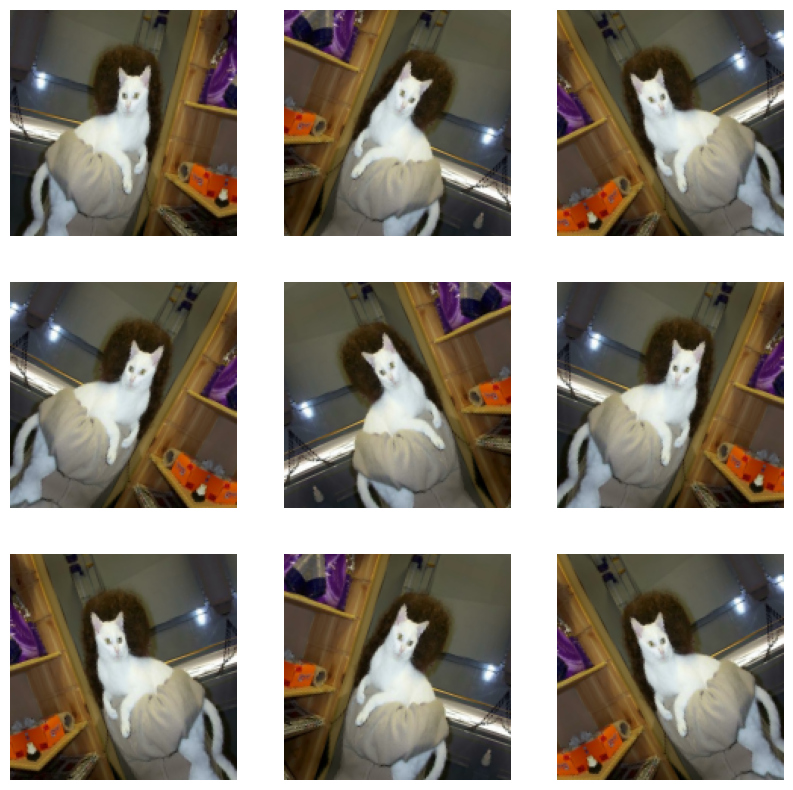

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Существует несколько способов реализации дополнения данных и далее мы с ними ознакомимся.

### Вариант 1. Обогащение данных как часть модели

В данном случае мы включаем наши преобразования в модель и обогащение данных будет происходить прямо при работе модели.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1.0 / 255),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss=tf.keras.losses.binary_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)       

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10, verbose=1)

Epoch 1/10
1178/1178 [==============================] - 35s 29ms/step - loss: 0.6111 - accuracy: 0.6646 - val_loss: 0.5438 - val_accuracy: 0.7270
Epoch 2/10
1178/1178 [==============================] - 34s 29ms/step - loss: 0.5329 - accuracy: 0.7324 - val_loss: 0.4981 - val_accuracy: 0.7567
Epoch 3/10
1178/1178 [==============================] - 33s 28ms/step - loss: 0.4832 - accuracy: 0.7694 - val_loss: 0.4585 - val_accuracy: 0.7756
Epoch 4/10
1178/1178 [==============================] - 33s 28ms/step - loss: 0.4525 - accuracy: 0.7881 - val_loss: 0.4099 - val_accuracy: 0.8106
Epoch 5/10
1178/1178 [==============================] - 34s 29ms/step - loss: 0.4222 - accuracy: 0.8065 - val_loss: 0.3720 - val_accuracy: 0.8274
Epoch 6/10
1178/1178 [==============================] - 34s 29ms/step - loss: 0.4019 - accuracy: 0.8176 - val_loss: 0.3661 - val_accuracy: 0.8401
Epoch 7/10
1178/1178 [==============================] - 34s 29ms/step - loss: 0.3799 - accuracy: 0.8297 - val_loss: 0.3800 -

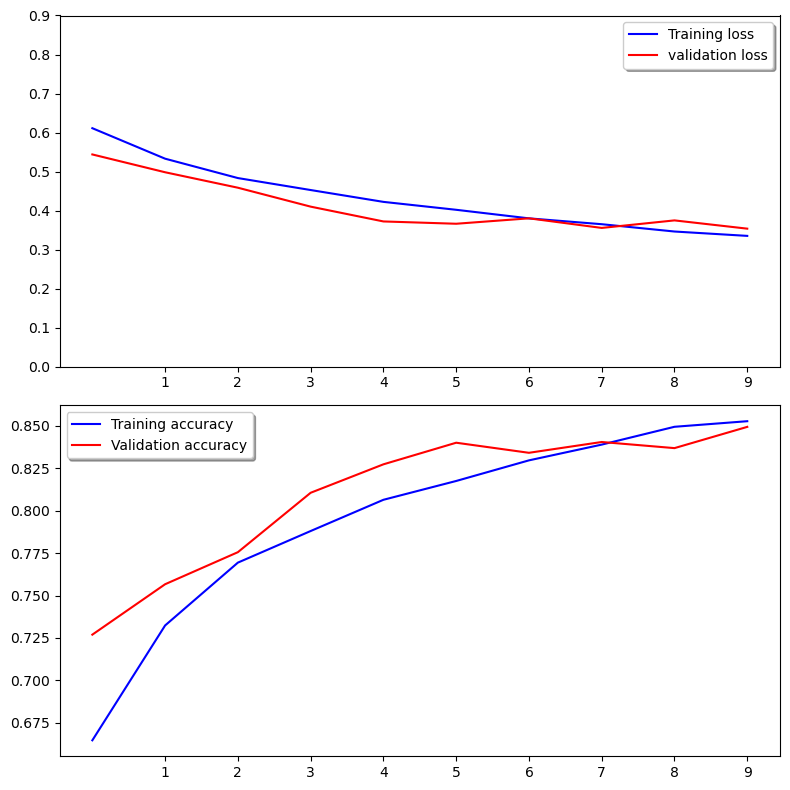

In [ ]:
learning_curves(history, 10)

### Вариант 2. Обогащение данных на уровне набора данных

Обогащение данных можно применить к набору даных и не трогать саму модель. При этом обогащение не будет применяться в рабочем режиме.

In [ ]:
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x), y))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    tf.keras.layers.Rescaling(1.0 / 255),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.binary_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])

In [ ]:
history = model.fit(augmented_train_ds, validation_data=val_ds, epochs=10, verbose=1)

Epoch 1/10
1178/1178 [==============================] - 93s 78ms/step - loss: 0.6016 - accuracy: 0.6653 - val_loss: 0.5161 - val_accuracy: 0.7382
Epoch 2/10
1178/1178 [==============================] - 87s 74ms/step - loss: 0.5179 - accuracy: 0.7430 - val_loss: 0.4937 - val_accuracy: 0.7590
Epoch 3/10
1178/1178 [==============================] - 86s 73ms/step - loss: 0.4762 - accuracy: 0.7714 - val_loss: 0.4198 - val_accuracy: 0.8000
Epoch 4/10
1178/1178 [==============================] - 87s 74ms/step - loss: 0.4408 - accuracy: 0.7953 - val_loss: 0.4092 - val_accuracy: 0.8117
Epoch 5/10
1178/1178 [==============================] - 88s 75ms/step - loss: 0.4148 - accuracy: 0.8104 - val_loss: 0.3931 - val_accuracy: 0.8170
Epoch 6/10
1178/1178 [==============================] - 89s 76ms/step - loss: 0.3942 - accuracy: 0.8227 - val_loss: 0.3736 - val_accuracy: 0.8338
Epoch 7/10
1178/1178 [==============================] - 89s 75ms/step - loss: 0.3706 - accuracy: 0.8358 - val_loss: 0.3618 -

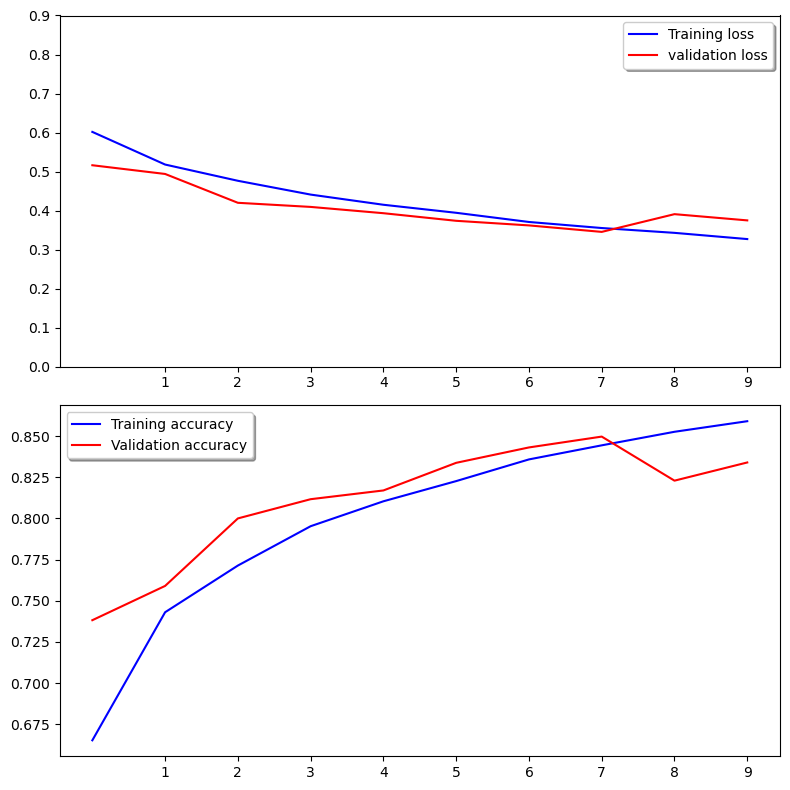

In [ ]:
learning_curves(history, 10)

### Вариант 3. Использование генераторов

Для загрузки изображений и автоматического обогащения можно применять генераторы изображений. Они представлены встроенным классом keras.preprocessing.image.ImageDataGenerator.

Генератор обеспечивает автоматическую загрузку изображений из директори на диске, преобразования и дополнение изображений. Фактически, заменяет собой набор данных с указанными свойствами.

Для генераторов необходимо подготовить директории с изображениями, которые разделены на обучающую и тестовую выборки.

In [ ]:
try:
    os.mkdir('tmp')
    os.mkdir('tmp/train')
    os.mkdir('tmp/test')
    os.mkdir('tmp/train/cats')
    os.mkdir('tmp/train/dogs')
    os.mkdir('tmp/test/cats')
    os.mkdir('tmp/test/dogs')
except OSError:
    pass

In [ ]:
def split_data(src_dir, train_dir, test_dir, split_size):
    files = []
    for filename in os.listdir(src_dir):
        file = src_dir + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " игнорируем файл нулевой длины.")

    training_length = int(len(files) * split_size)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = src_dir + filename
        destination = train_dir + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = src_dir + filename
        destination = test_dir + filename
        copyfile(this_file, destination)

In [ ]:
cats_src = "PetImages/Cat/"
train_cats = "tmp/train/cats/"
test_cats = "tmp/test/cats/"
dogs_src = "PetImages/Dog/"
train_dogs = "tmp/train/dogs/"
test_dogs = "tmp/test/dogs/"

In [ ]:
split_size = .8
split_data(cats_src, train_cats, test_cats, split_size)
split_data(dogs_src, train_dogs, test_dogs, split_size)

У нас должны получиться 2 директории, train и test, в каждой из которых изображения рпсположены в поддиректориях, соответствующих меткам классов.

Теперь создадим сами генераторы. В настройках генератора укажем настройки различных преобразований для обогащения данных. Если это сделать, то к изображениям случайным образом будут применяться настроенные преобразования. Для того, чтобы получить пригодный для обучения набор данных, после конфигурирования генератора надо вызвать метод flow_from_directory.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "tmp/train"

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

val_dir = "tmp/test"

validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              batch_size=16,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 22620 images belonging to 2 classes.
Found 8460 images belonging to 2 classes.


Всё, генераторы настроены, изображения найдены, теперь можем собирать и обучать модель.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.binary_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=2, verbose=1, validation_data=validation_generator)

Epoch 1/2
1414/1414 [==============================] - 222s 157ms/step - loss: 0.5050 - accuracy: 0.7551 - val_loss: 0.5000 - val_accuracy: 0.7560
Epoch 2/2
1414/1414 [==============================] - 223s 157ms/step - loss: 0.4677 - accuracy: 0.7797 - val_loss: 0.5192 - val_accuracy: 0.7567


## Задание

1. Добейтесь точности 97% и выше на наборе данных "Dogs vs Cats".
2. Решите задачу классификации для набора данных "Horses or humans". При необходимости обоснуйте и примените обогащение данных.

https://laurencemoroney.com/datasets.html